In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.model_selection import train_test_split

# 加载数据
X = np.load("gpt3emb.npy")
y = np.load("y.npy")

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建模型
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 假设是一个二分类问题

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 设置早停和模型检查点
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs')

2023-12-10 14:26:42.145694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 14:26:43.259930: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10099 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:b1:00.0, compute capability: 8.6


In [5]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping, model_checkpoint, tensorboard], verbose=1)

Epoch 1/50


2023-12-10 14:26:52.728801: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


449/449 [==============================] - 5s 5ms/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 0.0055 - val_accuracy: 0.9986
Epoch 2/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.0046 - val_accuracy: 0.9982
Epoch 3/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0073 - val_accuracy: 0.9974
Epoch 4/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 5/50
449/449 [==============================] - 2s 5ms/step - loss: 6.3874e-04 - accuracy: 0.9999 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 6/50
449/449 [==============================] - 2s 5ms/step - loss: 2.8805e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9987
Epoch 7/50
449/449 [==============================] - 2s 4ms/step - loss: 5.8897e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9994
Epoch

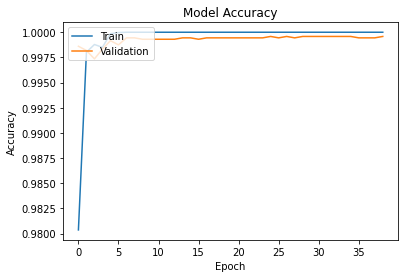

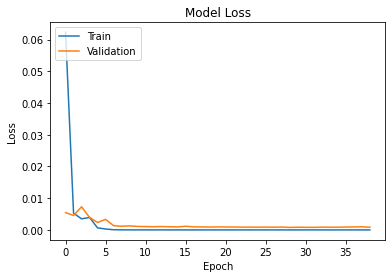

In [6]:
import matplotlib.pyplot as plt

# 绘制精度图
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 绘制损失图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
from sklearn.metrics import classification_report
import numpy as np

# 预测测试集
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int).flatten()  # 将输出四舍五入并转换为整数

# 生成分类报告
print(classification_report(y_test, y_pred))

281/281 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4677
           1       1.00      1.00      1.00      4301

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978



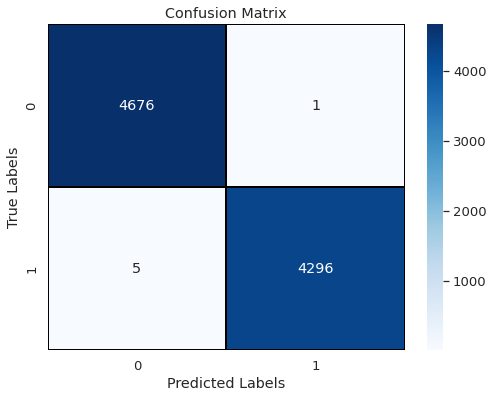

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建热图
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()